# ROC_AUC

Santoと申します。
日頃、大学の方で医療統計で統計学をメインに学習しています。

今回のRNSAコンペで使われている評価指標のROC曲線(Receiver Operatorating Characteristic curve)を用いたAUC(Area Under the Curve)について、このコンペ以外にも大学の課題で論文を読むときにも使用していることが少しあるので、簡単にまとめてました。もし、間違っていることがありましたら是非コメントなどで教えてください。

## 目次
#### 1. [混同行列(confusion matrix)](#confusion)
#### 2. [ROC曲線・AUC](#ROC)
#### [参考文献](#reference)

<a id="confusion"></a>
# 1. 混同行列(confusion matrix)

混同行列はある予測したい変数$y$を含む教師データに対してある予測モデルを用いて$y$の予測を行うとき、その教師データに対して(予測したいデータでも構いませんが...)の予測とそのデータの真値を表によってまとめたものです。

2値データを仮定すると、$2(予測) × 2(真値)=4$の4パターンが考えられます。

混同行列についてまとめると以下のようになります。

(画像が大きくなるのはごめんなさい..
自分で貼った画像で大きさを変えられる対処の仕方教えて欲しいです...)

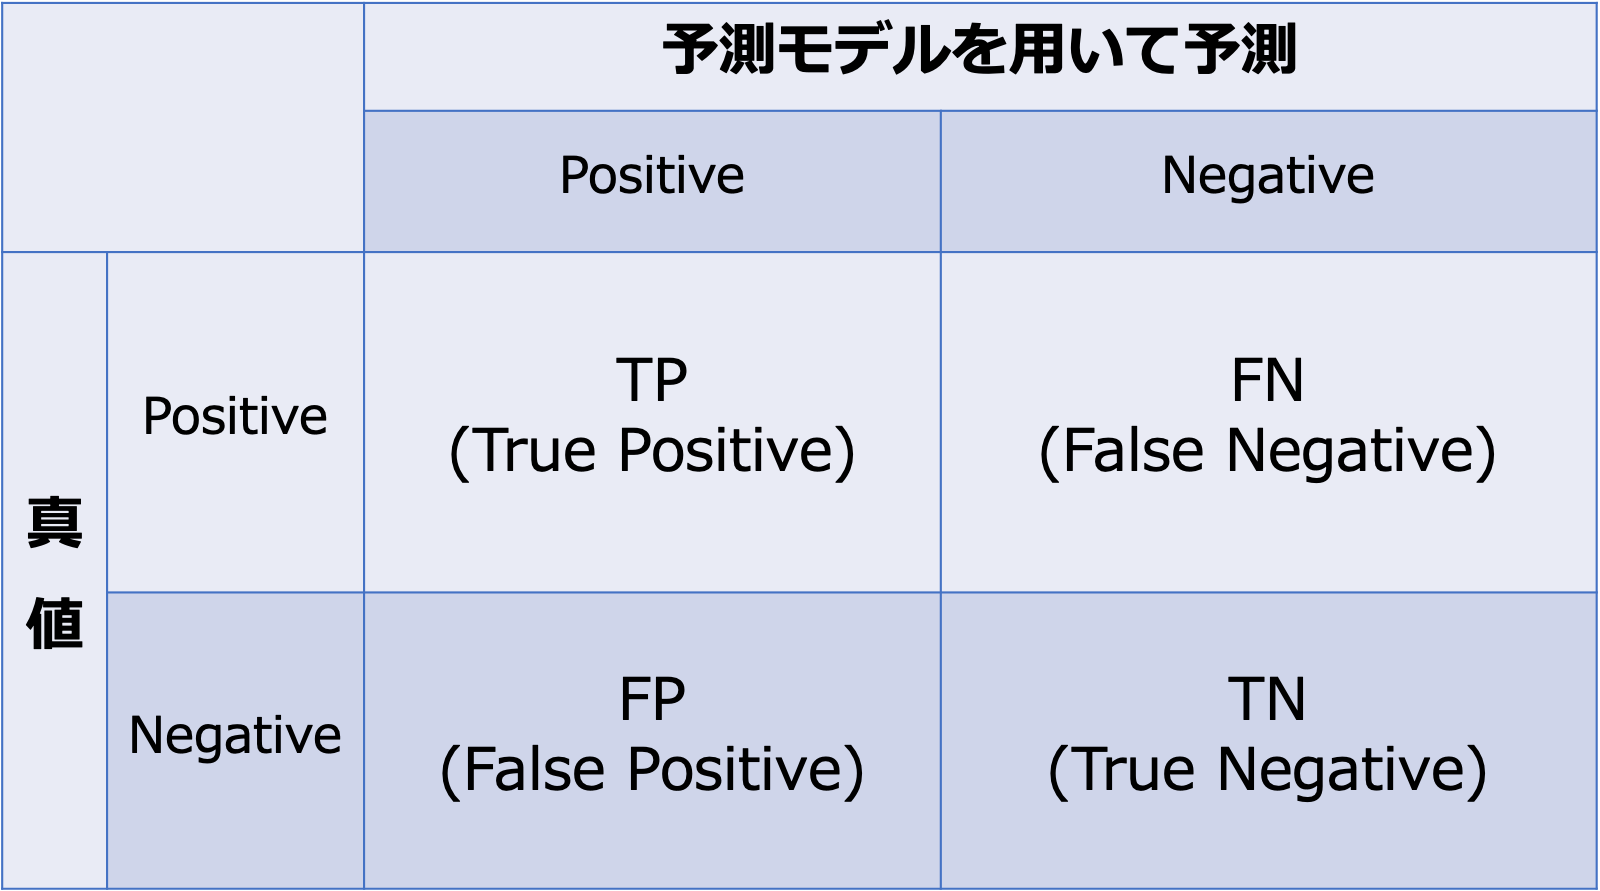


また、様々な指標も存在しています。
* $accuracy =\frac{TP+FN}{TP+FP+FN+TN} = \frac{正しく予測できた数}{データ数}$
* $TPR(True Positive Rate) or Recall = \frac{TP}{TP+FN}$
* $FPR(False Positive Rate) = \frac{FP}{FP+TN}$
* $Precision = \frac{TP}{TP+FP}$
* $F-measure = 2×(\frac{1}{TPR}+\frac{1}{Precision})^{-1}$

<a id="ROC"></a>
# 2.ROC曲線・AUC

ここからはROC曲線についてです。
ROC曲線の書き方については、参考文献をメインに行っていきます。<br>
まずはROC曲線がどのようなものなのかグラフを見て見ます。(写真ですが結構前に作成したグラフです)
<img src="https://github.com/santoHide/issues/blob/main/kaggle/2021/RNSA/ROC%E6%9B%B2%E7%B7%9A.png?raw=true" width="90%">

このようなグラフがROC曲線と呼ばれているものです。
縦軸にTPR、横軸にFPRを取ってこの曲線の下側の面積がAUCになります。<br>
実際に参考文献の論文のコードになぞってグラフを書いてみようと思います。<br>

2021/8/4 ROCのプロット点を関数化しました。使いたい人は使ってください。

In [ ]:
import numpy as np 
#ROCに必要なプロット点を作成
def make_roc_plot_points(L,c):
    N = sum(c==0) #class 0:negative
    P = sum(c==1) #class 1:positive
    R = np.empty((0,2), float) #presurve plot points
    i = 0
    FP = 0
    TP = 0
    f = -100000
    while(i <c.shape[0]):
        if L[i] != f:
            R = np.append(R, np.array([[FP/N, TP/P]]), axis=0)  
            f = L[i]
        if c[i] == 1:
            TP = TP+1
        else:
            FP = FP+1
        i = i + 1
    return(R)


In [ ]:
L = np.array([0.9,0.8,0.7,0.6,0.55,0.54,0.53,0.52,0.51,0.505,
    0.4,0.39,0.38,0.37,0.36,0.35,0.34,0.33,0.30,0.1]) #予測されたスコア
c = np.array([1,1,0,1,1,1,0,0,1,0,
    1,0,1,0,0,0,1,0,1,0]) 
R = make_roc_plot_points(L,c)
print(R)

これでプロット点は完成しました<br>
このプロット点を用いてグラフを作成します!

In [ ]:
import matplotlib.pyplot as plt
plt.plot(R[:,0],R[:,1],linestyle='solid',color='blue')
plt.title("Receiver Operatorating Characteristic curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

グラフが作成できたので次にAUCを計算します。

In [ ]:
AUC = 0
for i in range(c.shape[0]-1):
    AUC = AUC + (R[i+1,0]-R[i,0])*R[i,1]
AUC

AUC=0.58という値になりました。<br>
AUCの値はランダムに目的変数$y$を予測していると0.5の値になり、1に近いほどモデルの性能は良いらしいです。<br>
高いAUCの値を目指せるように頑張りましょう!!


<a id="reference"></a>
# 参考文献
[1] Tom Fawcett. ROC Graphs: Notes and Practical Considerations for Researchers. *Pattern Recognition Letters*. 2002; **31**(8): 1-38.